## The power of Numpy

In this notebook we'll go through some numpy exercises to warm up before coding the neural network.

NumPy is the fundamental package for scientific computing in Python. It provides multidimensional array objects, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more. Let's dig in!

In [23]:
import numpy as np
import copy
from utils import create_3d_matrix, visualize_3d_matrix
from typing import Dict, List, Tuple


In [24]:
# Creating a matrix
a  = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Perform various operations on the matrix a.
print("Original matrix:")
print(a)

print("\nTranspose of the matrix:")
print(a.T)

print("\nSum of all elements:")
print(np.sum(a))

print("\nMean of all elements:")
print(np.mean(a))

print("\nMaximum element:")
print(np.max(a))

print("\nMinimum element:")
print(np.min(a))

print("\nZeros matrix of dimension 2x4x5:")
zeros = np.zeros([2,4,5])
print(zeros)

Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Transpose of the matrix:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

Sum of all elements:
45

Mean of all elements:
5.0

Maximum element:
9

Minimum element:
1

Zeros matrix of dimension 2x4x5:
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


[[[0.20610675 0.06973365 0.22816488 0.61273644 0.01967475]
  [0.92779308 0.52484782 0.32129537 0.38100649 0.80688724]
  [0.91539632 0.70749099 0.54071366 0.14908795 0.31379382]
  [0.32846247 0.49428782 0.0495377  0.63619981 0.72062766]]

 [[0.91196627 0.26625787 0.76896998 0.10562477 0.07693419]
  [0.02946739 0.52678197 0.62096612 0.75548901 0.23017485]
  [0.95498517 0.76301283 0.60125339 0.61312087 0.98235201]
  [0.92429248 0.65506093 0.50919556 0.09247431 0.58047807]]

 [[0.59937741 0.41406774 0.12720414 0.95359381 0.14127736]
  [0.54571053 0.58377172 0.15722176 0.52266058 0.59310648]
  [0.5474381  0.79587283 0.19897857 0.51325192 0.49996273]
  [0.27424275 0.38708617 0.97892153 0.93835993 0.58914572]]]


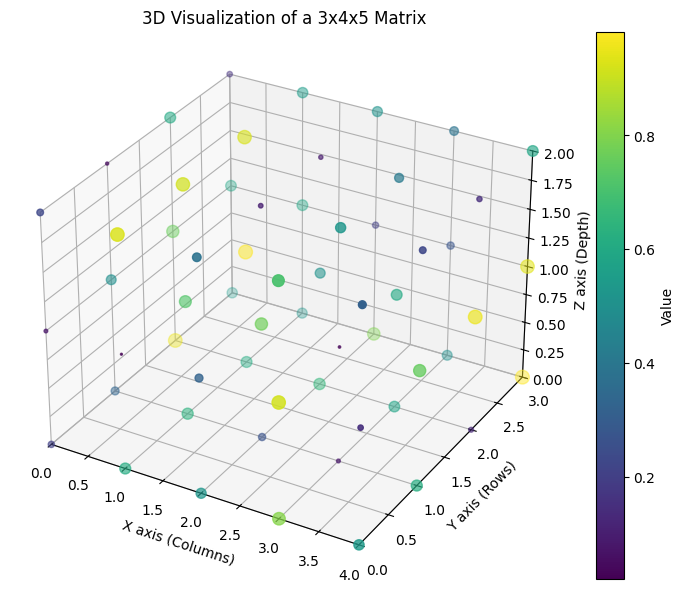

In [25]:
# Create and visualize a 3D matrix
matrix_3d = create_3d_matrix((3, 4, 5))  # 3x4x5 matrix
print(matrix_3d)
visualize_3d_matrix(matrix_3d)

#### Matrix multiplication and elemt wise operations

In [26]:
print("Original matrix")
print(a)
# Dot multiplication of 2 matrices
result = np.dot(a, a.T)
print("\nMatrix multiplication (A * A):")
print(result)

# Element-wise square root
print("\nElement-wise square root:")
print(np.sqrt(a))

# Element-wise exponentiation (squared) 
print("\nElement-wise exponentiation (squared):")
print(np.power(a,2))


Original matrix
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix multiplication (A * A):
[[ 14  32  50]
 [ 32  77 122]
 [ 50 122 194]]

Element-wise square root:
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]

Element-wise exponentiation (squared):
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


Now that we know some of the basic operations we can perform with Numpy, we can start developing the functions we need for our basic NN architecture. 

Functions we need to build to achieve an architercture of a neural network:  
- forward propagation - calculating current loss
- backward propagation - calculate current gradient
- gradient descent - update our learnable parameters

#### Building our activation function using numpy

TODO: add explanations about sigmoid and other activation functions

In [27]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    z is A scalar or numpy array of any size.
    """

    s = 1 / ( 1 + np.exp(-z) )

    return s

def relu(z):
    """ Relu activation function"""
    
    return max(0.0, z )

When training a neural network, we need to initialize the paramters **w** and **b**. There are several options here, we'll use zero initialization for now.

In [28]:
def initialize_with_zeros(dimension):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
    
    w = np.zeros((dimension, 1), dtype=float)
    b = float(0)
    
    return w, b

#### Forward and Backword propagation

In [29]:
def propagate(w, b, X, Y):
    """
        TODO add docstring explanation
    """
    
    m = X.shape[1]
    
    # activation
    A = sigmoid(np.dot(w.T,X) + b) 

    # calculate cost 
    cost = -1/m * np.sum( np.dot(np.log(A), Y.T) + np.dot(np.log(1-A), (1-Y.T)))

    # Backprop - find grads
    dw = 1/m *(np.dot(X,(A - Y).T))
    db = 1/m * (np.sum(A -Y))

    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Optimizer

In [30]:
def optimize(w: np.ndarray, b: float, X: np.ndarray, Y: np.ndarray, 
             num_iterations: int = 100, learning_rate: float = 0.009, 
             print_cost: bool = False) -> Tuple[Dict, Dict, List[float]]:
    """
    Performs gradient descent to optimize the parameters w and b.

    Args:
    w (np.ndarray): Initial weight vector
    b (float): Initial bias term
    X (np.ndarray): Input data, shape (num_features, num_examples)
    Y (np.ndarray): True "label" vector, shape (1, num_examples)
    num_iterations (int): Number of iterations of the optimization loop
    learning_rate (float): Learning rate of the gradient descent update rule
    print_cost (bool): Print the cost every 100 iterations if set to True

    Returns:
    params (Dict): Dictionary containing the optimized w and b
    grads (Dict): Dictionary containing the gradients of w and b
    costs (List[float]): List of all costs computed during the optimization
    """
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Forward and backward propagation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw, db = grads["dw"], grads["db"]
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
                
        # Record and print the cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs


### Other optimizers

In [ ]:
class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, w, dw):
        raise NotImplementedError

class SGD(Optimizer):
    def update(self, w, dw):
        return w - self.learning_rate * dw

class Momentum(Optimizer):
    def __init__(self, learning_rate=0.01, momentum=0.9):
        super().__init__(learning_rate)
        self.momentum = momentum
        self.v = None

    def update(self, w, dw):
        if self.v is None:
            self.v = np.zeros_like(w)
        self.v = self.momentum * self.v - self.learning_rate * dw
        return w + self.v

class RMSprop(Optimizer):
    def __init__(self, learning_rate=0.01, decay_rate=0.99, epsilon=1e-8):
        super().__init__(learning_rate)
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.s = None

    def update(self, w, dw):
        if self.s is None:
            self.s = np.zeros_like(w)
        self.s = self.decay_rate * self.s + (1 - self.decay_rate) * dw**2
        return w - (self.learning_rate / (np.sqrt(self.s) + self.epsilon)) * dw

class Adam(Optimizer):
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(learning_rate)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, w, dw):
        if self.m is None:
            self.m = np.zeros_like(w)
            self.v = np.zeros_like(w)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw**2)
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        
        return w - (self.learning_rate / (np.sqrt(v_hat) + self.epsilon)) * m_hat

def optimize(w, b, X, Y, num_iterations=100, optimizer=SGD()):
    for _ in range(num_iterations):
        # Compute gradients (assume we have a function for this)
        grads, cost = propagate(w, b, X, Y)
        dw, db = grads["dw"], grads['db']
        print(f"current cost: {cost}")
        # Update parameters
        w = optimizer.update(w, dw)
        b = optimizer.update(b, db.reshape(1, 1)).squeeze()

    return w, b

# Usage example
w = np.random.randn(10, 1)
b = np.zeros(1)
X = np.random.randn(10, 1000)
Y = np.random.randint(0, 2, (1, 1000))

# Using different optimizers
w_sgd, b_sgd = optimize(w, b, X, Y, optimizer=SGD(learning_rate=0.01))
# w_momentum, b_momentum = optimize(w, b, X, Y, optimizer=Momentum(learning_rate=0.01, momentum=0.9))
# w_rmsprop, b_rmsprop = optimize(w, b, X, Y, optimizer=RMSprop(learning_rate=0.01))
# w_adam, b_adam = optimize(w, b, X, Y, optimizer=Adam(learning_rate=0.01))
